## Kevin Egedy
## Lesson 2. Regression analysis: How Much Is Your Car Worth?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)

cars = pd.read_csv('../data/cars.csv')
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [3]:
# Put the command (or commands) here to answer the questions above.
#TODO
cars.describe()
print(f"Minimum priced car is {cars['Price'].min():0.2F}")
print(f"Minimum priced car is {cars['Price'].max():0.2F}")
print(f"Minimum mileage is {cars['Mileage'].min():0.2F}")
print(f"Minimum mileage is {cars['Mileage'].max():0.2F}")
print(f"Average mileage is {cars['Mileage'].mean():0.2F}")
print(f'Number of rows is {len(cars)}')
print(f'Number of columns is {len(cars.columns)}')
print(f'Columns: {list(cars.columns)}')
print(f'Number of null values is {cars.isnull().sum().sum()}')

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


Minimum priced car is 8638.93
Minimum priced car is 70755.47
Minimum mileage is 266.00
Minimum mileage is 50387.00
Average mileage is 19831.93
Number of rows is 804
Number of columns is 12
Columns: ['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
Number of null values is 0


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

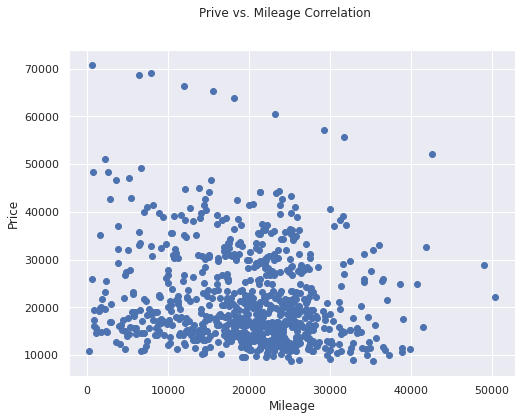

In [4]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,figsize=(8,6))
#X = np.array(cars['Mileage']).reshape(-1, 1) 
X = cars['Mileage']
#y = np.array(cars['Price']).reshape(-1, 1) 
y = cars['Price']
ax.scatter(X,y)

fig.suptitle('Prive vs. Mileage Correlation')
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.show();

<p>
Answer:
    
It is not immediately clear that cars with more mileage are worth less. Most of the data samples occur between 10000-30000 miles and 10000-30000 dollars. In general, there is a downward trend in price as miles increase.
</p>

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [5]:
# https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api
# for understanding difference between statsmodels.api.OLS and statsmodels.formula.api.ols

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars['Mileage'], cars['Price'], test_size=0.3)

In [6]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy import stats

# TODO: Linear regression model
# TODO: Show summary statistics for the model

print('SKLEARN SUMMARY')
sklearnModel = LinearRegression().fit(
    np.array(X_train).reshape(-1, 1),
    np.array(y_train).reshape(-1, 1)
)
print(f'Coefficients: {sklearnModel.coef_[0][0]}')
print(f'Intercept: {sklearnModel.intercept_[0]}')

print('\nSCIPY STATS SUMMARY')
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train, y_train)
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'r_value: {r_value}')
print(f'p_value: {p_value}')

print('\nSTATSMODELS SUMMARY')
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm).fit()
print(statsModels.summary())

SKLEARN SUMMARY
Coefficients: -0.16771888134692697
Intercept: 24424.175545024395

SCIPY STATS SUMMARY
Slope: -0.16771888134692692
Intercept: 24424.175545024395
r_value: -0.14167890009237138
p_value: 0.0007564876128678962

STATSMODELS SUMMARY
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     11.47
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           0.000756
Time:                        13:38:48   Log-Likelihood:                -5955.1
No. Observations:                 562   AIC:                         1.191e+04
Df Residuals:                     560   BIC:                         1.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust          

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [7]:
# Command:

# One sentence summary:
'''
The price decreases as the miles increase on the car according to the model coefficient/slope (-$0.16).
''' 

'\nThe price decreases as the miles increase on the car according to the model coefficient/slope (-$0.16).\n'

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [8]:
# Single command
'''
The expected value of a car with 0 miles is $26035 according to the model intercept.
'''

'\nThe expected value of a car with 0 miles is $26035 according to the model intercept.\n'

<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

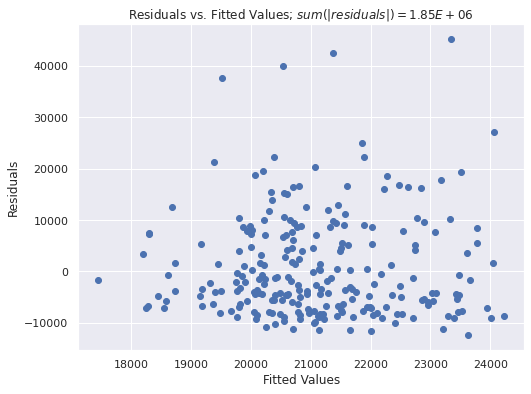

In [9]:
# Plot residuals
fig,ax = plt.subplots(1,figsize=(8,6))

y_pred = sklearnModel.predict(np.array(X_test).reshape(-1, 1))
y_test = np.array(y_test).reshape(-1, 1)
residuals = np.array(y_test - y_pred)
s = sum(np.abs(residuals))[0]
ax.scatter(y_pred,residuals)

ax.set_title(f'Residuals vs. Fitted Values; $sum(|residuals|) = {round(s):.2E}$')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.show();

In [10]:
print(f'R^2 Score : {sklearnModel.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)) :0.5F}')

R^2 Score : 0.02007


<p>
<b>Explain whether there are any problems (1-2 sentence)</b>

The residuals show that the model is not converging around the solution (y=0 line). Prediction errors vary widely at all mile inputs.
</p>

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [11]:
# Commands:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

y = cars['Price']
X = cars[['Mileage','Cylinder','Doors','Cruise','Sound','Leather']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#X_train[['Mileage','Cylinder','Doors','Cruise','Sound','Leather']] = scale.fit_transform(X_train)

# sklearn
sklearnModel = LinearRegression().fit(X_train,y_train)
print(f'Coefficients: {sklearnModel.coef_}')
print(f'Intercept: {sklearnModel.intercept_}')

# statsmodel
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm).fit()
print(statsModels.summary())
print('\nP VALUES')
print(statsModels.pvalues[statsModels.pvalues < 0.05].sort_values())

Coefficients: [-1.82162698e-01  3.08355575e+03 -1.35422363e+03  5.87339121e+03
 -2.52989259e+03  3.34215101e+03]
Intercept: 8236.682652046613
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     77.57
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.27e-70
Time:                        13:38:48   Log-Likelihood:                -5782.1
No. Observations:                 562   AIC:                         1.158e+04
Df Residuals:                     555   BIC:                         1.161e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

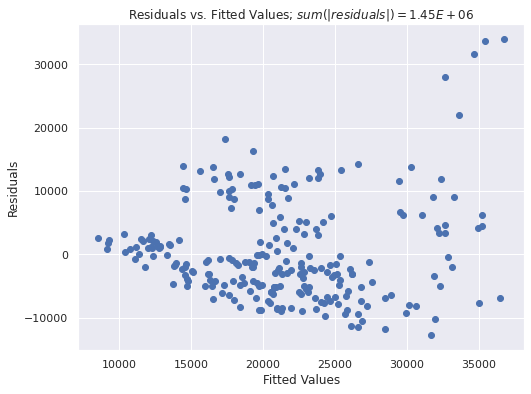

In [12]:
# Plot residuals
fig,ax = plt.subplots(1,figsize=(8,6))

y_pred = sklearnModel.predict(X_test)
residuals = np.array(y_test - y_pred)
s = sum(abs(residuals))
ax.scatter(y_pred,residuals)

ax.set_title(f'Residuals vs. Fitted Values; $sum(|residuals|) = {round(s):.2E}$')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.show();

In [13]:
print(f'Score : {sklearnModel.score(X_train, y_train) :0.5F}')

Score : 0.45612


<p>
<b>Comments:</b>

Looking at the coefficient of determination $R^{2}$, it can be seen that the model improves dramaticallly. Previous value improves from 0.021 to 0.443. 
</p>
    

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

/home/kegedy/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


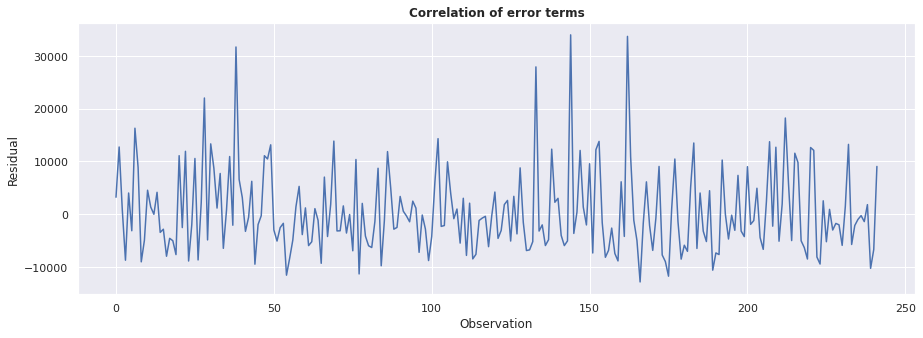

In [14]:
# Command(s):
fig,ax = plt.subplots(1, figsize=(15, 5))
ax = sns.lineplot(list(range(residuals.shape[0])),residuals)
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('Correlation of error terms', fontweight='bold')
plt.show();

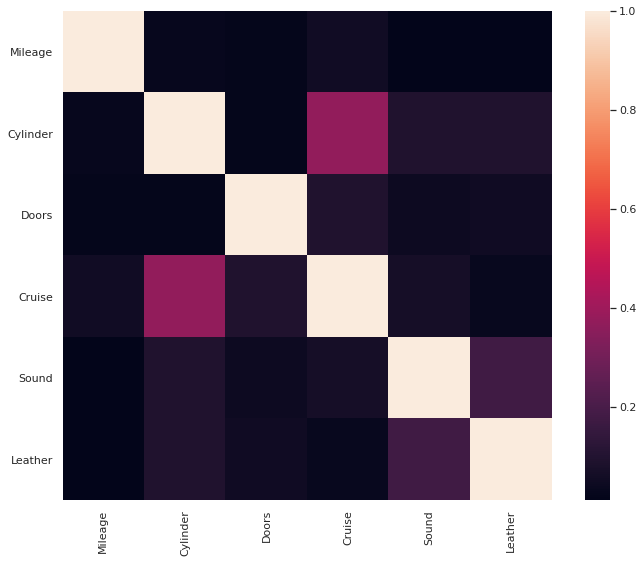

In [15]:
f, ax = plt.subplots(figsize=(12, 9))

corr_matrix = X_train.corr().abs()
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show();

<p>
<b>Comments:</b>

There is a slight increase in error as the observations increase. This suggests there is some collinearity, since it reduces the accuracy of the estimates of the regression coefficients. Looking at the correlation matrix there is some collinearity between cruise and cylinder.
</p>

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [16]:
x = {'Mileage':30000, 'Cylinder':4, 'Doors':2, 'Cruise':1, 'Sound':1, 'Leather':1}
chevy = pd.DataFrame.from_dict(data=x,orient='index').T

# Commands that estimate the price of 'chevy' using the model with 6 predictors
y_pred = sklearnModel.predict(chevy)
print(f'Expected price for Chevy sedan is ${round(y_pred[0],2)}')

Expected price for Chevy sedan is $19083.23


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [22]:
# Commands
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Prep
m = {}
y = cars['Price']
X = cars.drop(['Price'],axis=1)
X_prep = X.copy()
num_cols = X._get_numeric_data().columns
cat_cols = [col for col in X.columns if col not in num_cols]
for col in cat_cols:
    X[col] = X[col].astype('category')
    X_prep[col] = X_prep[col].astype('category')
    X[f'{col}_enc'] = labelencoder.fit_transform(X[col])
    X_prep[col] = labelencoder.fit_transform(X_prep[col])
    m[col] = list(X[col].unique())
    
# Update Liter to categorical
X_prep['Liter'] = X_prep['Liter'].astype('category')
    
# Split
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.3)
print('X.head()'); X.head()
print('X_train.head()'); X_train.head()

# Missing Features
missed = [x for x in X_prep.columns if x not in chevy.columns]
print('missed'); missed

# Explore data for Make == 'Chevrolet'
sub = X.loc[X['Make']=='Chevrolet',missed]
sub['Liter'] = sub['Liter'].astype('category')
summary = sub.describe(include='category')
print('summary'); summary
print('m'); m

# Find Top Model and Trim
model = summary.loc['top','Model']
trim = summary.loc['top','Trim']
typ = summary.loc['top','Type']
liter = summary.loc['top','Liter']
make_enc = m['Make'].index('Chevrolet')
model_enc = m['Model'].index(model)
trim_enc = m['Trim'].index(trim)
type_enc = m['Type'].index(typ)
liter_enc = liter

# Append missing columns to Chevy
x = {
    'Make':make_enc, 
    'Model':model_enc, 
    'Trim':trim_enc, 
    'Type':type_enc, 
    'Liter':liter_enc
}
missedDF = pd.DataFrame.from_dict(data=x,orient='index').T
new_chevy = pd.concat([chevy, missedDF],axis=1)
new_chevy = new_chevy[X_prep.columns] # rearrange cols
print('new_chevy'); new_chevy

# sklearn
sklearnModel = LinearRegression().fit(X_train,y_train)
y_pred = sklearnModel.predict(new_chevy)
print(f'Expected price for Chevy (all features) is ${round(y_pred[0],2)}')

X.head()


,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_enc,Model_enc,Trim_enc,Type_enc
0,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0,10,44,3
1,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,44,3
2,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,44,3
3,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0,10,44,3
4,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0,10,44,3


X_train.head()


,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
75,17480,0,26,45,3,6,3.8,4,1,1,0
240,2464,2,9,25,3,4,2.2,4,0,1,1
410,6608,2,24,30,2,6,3.5,4,1,1,1
418,24905,2,24,30,2,6,3.5,4,1,1,1
617,27438,3,30,17,4,4,1.8,4,0,0,1


missed


['Make', 'Model', 'Trim', 'Type', 'Liter']

summary


,Make,Model,Trim,Type,Liter
count,320,320,320,320,320.0
unique,1,8,18,4,5.0
top,Chevrolet,AVEO,Sedan 4D,Sedan,2.2
freq,320,60,50,160,120.0


m


{'Make': ['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
 'Model': ['Century',
  'Lacrosse',
  'Lesabre',
  'Park Avenue',
  'CST-V',
  'CTS',
  'Deville',
  'STS-V6',
  'STS-V8',
  'XLR-V8',
  'AVEO',
  'Cavalier',
  'Classic',
  'Cobalt',
  'Corvette',
  'Impala',
  'Malibu',
  'Monte Carlo',
  'Bonneville',
  'G6',
  'Grand Am',
  'Grand Prix',
  'GTO',
  'Sunfire',
  'Vibe',
  '9_3',
  '9_3 HO',
  '9_5',
  '9_5 HO',
  '9-2X AWD',
  'Ion',
  'L Series'],
 'Trim': ['Sedan 4D',
  'CX Sedan 4D',
  'CXL Sedan 4D',
  'CXS Sedan 4D',
  'Custom Sedan 4D',
  'Limited Sedan 4D',
  'Special Ed Ultra 4D',
  'DHS Sedan 4D',
  'DTS Sedan 4D',
  'Hardtop Conv 2D',
  'LS Hatchback 4D',
  'LS Sedan 4D',
  'LT Hatchback 4D',
  'LT Sedan 4D',
  'SVM Hatchback 4D',
  'SVM Sedan 4D',
  'Coupe 2D',
  'LS Coupe 2D',
  'LS Sport Coupe 2D',
  'LS Sport Sedan 4D',
  'Conv 2D',
  'SS Sedan 4D',
  'LS MAXX Hback 4D',
  'LT MAXX Hback 4D',
  'MAXX Hback 4D',
  'LT Coupe 2D',
  'SS Coupe 2D',
 

new_chevy


,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,30000,2.0,10.0,0.0,0.0,4,2.2,2,1,1,1


Expected price for Chevy (all features) is $20821.16


In [18]:
# Chevy Combinations
sub = X[X['Make_enc']==make_enc]
c = sub.groupby(['Model', 'Trim']).size().reset_index().rename(columns={0:'count'}).sort_values(['Model', 'Trim'])
c.head(n=10)
c.shape

,Model,Trim,count
0,9-2X AWD,AWD Sportwagon 4D,0
1,9-2X AWD,Aero Conv 2D,0
2,9-2X AWD,Aero Sedan 4D,0
3,9-2X AWD,Aero Wagon 4D,0
4,9-2X AWD,Arc Conv 2D,0
5,9-2X AWD,Arc Sedan 4D,0
6,9-2X AWD,Arc Wagon 4D,0
7,9-2X AWD,CX Sedan 4D,0
8,9-2X AWD,CXL Sedan 4D,0
9,9-2X AWD,CXS Sedan 4D,0


(1504, 3)

In [19]:
# Predictions for all Chevy Models, Trims, Types, Liters
x = {'Mileage':30000, 'Cylinder':4, 'Doors':2, 'Cruise':1, 'Sound':1, 'Leather':1}
chevy = pd.DataFrame.from_dict(data=x,orient='index').T

chevy_preds = []
sub = X[X['Make_enc']==make_enc]
for name,group in sub.groupby(['Model', 'Trim', 'Liter']):
    group = group.reset_index(drop=True)
    x = {
        'Make':group.loc[0,'Make_enc'], 
        'Model':group.loc[0,'Model_enc'], 
        'Trim':group.loc[0,'Trim_enc'], 
        'Type':group.loc[0,'Type_enc'], 
        'Liter':group.loc[0,'Liter']
    }
    missedDF = pd.DataFrame.from_dict(data=x,orient='index').T
    new_chevy = pd.concat([chevy, missedDF],axis=1)
    new_chevy = new_chevy[X_prep.columns] # rearrange cols
    price = sklearnModel.predict(new_chevy)
    chevy_preds.append(price)
    #print(
    #    group.loc[0,'Model'],
    #    group.loc[0,'Trim'],
    #    group.loc[0,'Liter'],
    #    round(price[0],2)
    #)
    
chevyDF = pd.DataFrame(chevy_preds,columns=['chevy_preds'])
chevyDF.describe()

,chevy_preds
count,32.000000
mean,15851.284535
std,2791.559280
min,11242.459601
25%,12998.127626
50%,16367.208220
75%,18199.750623
max,19872.413369


In [20]:
# statsmodel Summary
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(statsModels.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     52.65
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.19e-78
Time:                        13:38:49   Log-Likelihood:                -5761.2
No. Observations:                 562   AIC:                         1.155e+04
Df Residuals:                     550   BIC:                         1.160e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4560.8765   2930.899      1.556      0.1

In [21]:
# Comments on problems
# 1. Convert categorical labels into integer representation
# 2. Supply values for missing labels since chevy only includes Mileage,Cylinder,Doors,Cruise,Sound,Leather
#       Research different approaches for providing missing data
# 3. Understand that some labels might be numerical but should be treated as categorical such as 'Liter'
# 4. Model R^2 improved so there exists necessary features that need to be included in the model
# 5. I noticed that the top Chevy input I provided doesn't exist in the data
#      Even though the input I created isn't a real car - it still provides insight.
#      The input was a combination of all the top features from Chevy vehicles.

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

<p>
<b>enter your response here</b>

I enjoyed learning how to read model scoring summaries. I gained a greater understanding of P variables and its importance in model dependence (P < 0.05). I also learned that if a variable has a confidence interval that includes 0, that this variable is likely to be insignificant. Lastly, I learned that plotting residuals against the number of observations is a great way to find collinearity. Using the scoring summaries, I'm able to find collinear variables and remove them to improve model performance.
</p>